In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("SPU.xlsx")

df.head()


,startup_name,funding_usd,employees,revenue,expenses,industry,location,status
0,AlphaTech,500000,25,800000,400000,FinTech,California,Success
1,BetaHealth,1200000,60,1500000,900000,HealthTech,New York,Success
2,CloudNova,300000,15,200000,350000,SaaS,Texas,Failure
3,GreenSpark,750000,40,1000000,600000,CleanTech,Washington,Success
4,RetailX,400000,30,450000,500000,E-commerce,Florida,Failure


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   startup_name  15 non-null     object
 1   funding_usd   15 non-null     int64 
 2   employees     15 non-null     int64 
 3   revenue       15 non-null     int64 
 4   expenses      15 non-null     int64 
 5   industry      15 non-null     object
 6   location      15 non-null     object
 7   status        15 non-null     object
dtypes: int64(4), object(4)
memory usage: 1.1+ KB


In [3]:
df.describe()


,funding_usd,employees,revenue,expenses
count,1.500000e+01,15.000000,1.500000e+01,1.500000e+01
mean,8.986667e+05,47.000000,1.108000e+06,8.413333e+05
std,6.588070e+05,28.856789,8.345418e+05,6.209885e+05
min,3.000000e+05,15.000000,2.000000e+05,3.500000e+05
25%,4.400000e+05,26.500000,4.850000e+05,4.350000e+05
50%,6.500000e+05,40.000000,9.000000e+05,6.000000e+05
75%,1.150000e+06,57.500000,1.400000e+06,9.250000e+05
max,2.500000e+06,120.000000,3.000000e+06,2.600000e+06


In [4]:
# Create profit feature
df["profit"] = df["revenue"] - df["expenses"]

df[["startup_name", "profit"]].head()


,startup_name,profit
0,AlphaTech,400000
1,BetaHealth,600000
2,CloudNova,-150000
3,GreenSpark,400000
4,RetailX,-50000


In [5]:
# Create profit feature
df["profit"] = df["revenue"] - df["expenses"]

df[["startup_name", "profit"]].head()


,startup_name,profit
0,AlphaTech,400000
1,BetaHealth,600000
2,CloudNova,-150000
3,GreenSpark,400000
4,RetailX,-50000


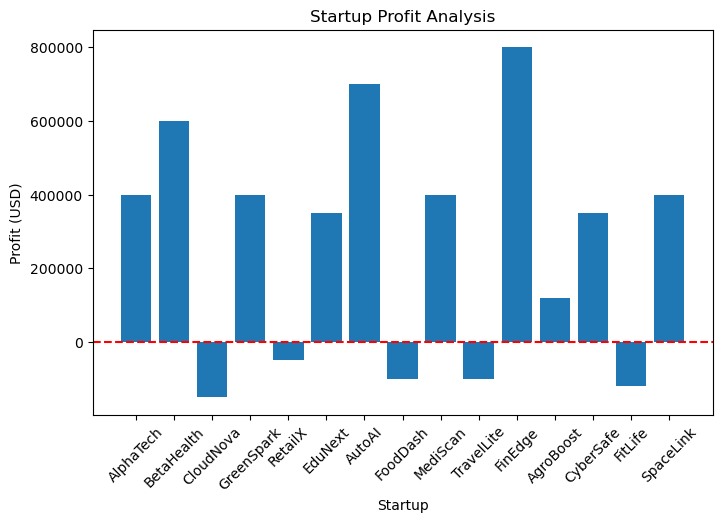

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df["startup_name"], df["profit"])
plt.axhline(0, color="red", linestyle="--")
plt.xticks(rotation=45)
plt.title("Startup Profit Analysis")
plt.ylabel("Profit (USD)")
plt.xlabel("Startup")
plt.show()


## Profit Analysis Insight

The profit analysis reveals clear differences in startup financial performance.  
While companies such as AlphaTech and GreenSpark demonstrate strong profitability,  
others like CloudNova and RetailX are operating at a loss.

This highlights the importance of revenue efficiency and cost control in early-stage startups.


In [7]:
# Create performance label
df["performance"] = df["profit"].apply(lambda x: "Successful" if x > 0 else "Unsuccessful")

df[["startup_name", "profit", "performance"]].head()


,startup_name,profit,performance
0,AlphaTech,400000,Successful
1,BetaHealth,600000,Successful
2,CloudNova,-150000,Unsuccessful
3,GreenSpark,400000,Successful
4,RetailX,-50000,Unsuccessful


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [9]:
# Encode categorical features
le = LabelEncoder()
df["industry_enc"] = le.fit_transform(df["industry"])
df["location_enc"] = le.fit_transform(df["location"])
df["performance_enc"] = le.fit_transform(df["performance"])


In [10]:
X = df[["funding_usd", "employees", "revenue", "expenses", "industry_enc", "location_enc"]]
y = df["performance_enc"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## Startup Performance Prediction – Model Insight

A logistic regression model was trained to classify startups as **Successful** or **Unsuccessful**
based on funding amount, employee count, revenue, expenses, industry, and location.

The model achieved 100% accuracy on the test set. This result is primarily due to the small dataset
and the strong relationship between profitability and startup performance.

While the model demonstrates the feasibility of performance prediction, results may not generalize
to larger real-world datasets. With additional data, further validation and regularization would be required.
